# __ML Unige 2023: Advertisement Impact Prediction__
## Predicting customer subscriptions from an advertisement campaign
### Liam Phan, Michael Bigler and Manuela Giansante

***

# Packages

In [80]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from facets_overview.generic_feature_statistics_generator import GenericFeatureStatisticsGenerator
import matplotlib.pyplot as plt
import missingno as msno

In [111]:
# Color palette

main_col = "#274156"

# Data

In [98]:
# Train
train =  pd.read_csv('DATA/MLUnige2023_subscriptions_train.csv', index_col='Id', na_values='na', header=0)
train = train.astype({'job':'category', 'marital':'category', 'education':'category', 'device':'category', 'outcome_old':'category', 'X1':'category', 'X2':'category', 'X3':'category', 'X4':'float64', 'subscription':'category', 'day':'category', 'month':'category'})
train.day = pd.Categorical(train.day, ordered=True)
train.month = pd.Categorical(train.month, ordered=True)

# Test
test =  pd.read_csv('DATA/MLUnige2023_subscriptions_test.csv', index_col='Id', na_values='na', header=0)
test = test.astype({'job':'category', 'marital':'category', 'education':'category', 'device':'category', 'outcome_old':'category', 'X1':'category', 'X2':'category', 'X3':'category', 'X4':'float64', 'day':'category', 'month':'category'})
test.day = pd.Categorical(test.day, ordered=True)
test.month = pd.Categorical(test.month, ordered=True)


In [99]:
train

,age,job,marital,education,device,day,month,time_spent,banner_views,banner_views_old,days_elapsed_old,outcome_old,X1,X2,X3,X4,subscription
Id,,,,,,,,,,,,,,,,,
0,28,freelance,married,grad_school,smartphone,4,2,26.80,3,4,196,failure,0,0,1,0.072803,1
1,48,industrial_worker,married,university,smartphone,30,4,13.05,1,1,79,success,0,0,0,0.075454,1
2,27,teacher,married,university,smartphone,14,7,8.10,3,0,-1,NaN,0,1,1,0.068110,0
3,44,unemployed,divorced,university,smartphone,13,5,7.10,2,1,369,other,0,0,1,0.091942,0
4,29,manager,single,grad_school,smartphone,26,4,15.90,2,2,143,success,0,0,0,0.085922,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8947,54,industrial_worker,married,university,smartphone,16,7,7.30,1,0,-1,NaN,1,0,0,0.072803,0
8948,43,industrial_worker,married,university,smartphone,4,2,37.75,2,0,-1,NaN,0,0,1,0.081456,1
8949,27,manager,single,grad_school,NaN,5,6,29.00,3,0,-1,NaN,0,0,1,0.079186,1


In [100]:
test

,age,job,marital,education,device,day,month,time_spent,banner_views,banner_views_old,days_elapsed_old,outcome_old,X1,X2,X3,X4
Id,,,,,,,,,,,,,,,,
0,53,retired,married,university,NaN,17,6,5.25,1,0,-1,NaN,0,0,1,0.084570
1,61,manager,married,grad_school,smartphone,20,4,9.00,1,0,-1,NaN,0,0,0,0.075227
2,51,industrial_worker,married,university,NaN,4,7,9.65,1,0,-1,NaN,0,0,0,0.075781
3,34,manager,married,grad_school,NaN,28,5,13.45,2,0,-1,NaN,0,0,1,0.070043
4,30,manager,married,grad_school,smartphone,4,5,16.15,2,0,-1,NaN,0,0,0,0.171618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3832,47,industrial_worker,married,NaN,NaN,5,6,19.20,2,0,-1,NaN,0,0,1,0.104216
3833,30,teacher,single,university,smartphone,3,3,3.65,1,0,-1,NaN,1,0,0,0.077552
3834,55,teacher,married,university,NaN,26,6,5.15,5,0,-1,NaN,0,0,1,0.129156


## Duplicates

In [101]:
# Train
## check for duplicate rows
duplicates = train.duplicated()

## display the duplicate rows
print(train[duplicates])

# Test
## check for duplicate rows
duplicates = test.duplicated()

## display the duplicate rows
print("\n",test[duplicates])

Empty DataFrame
Columns: [age, job, marital, education, device, day, month, time_spent, banner_views, banner_views_old, days_elapsed_old, outcome_old, X1, X2, X3, X4, subscription]
Index: []

 Empty DataFrame
Columns: [age, job, marital, education, device, day, month, time_spent, banner_views, banner_views_old, days_elapsed_old, outcome_old, X1, X2, X3, X4]
Index: []


The dataframes __Train__ and __Test__ has no duplicate rows. 

## Missings

In [102]:
train.isna().sum()

age                    0
job                   61
marital                0
education            378
device              2050
day                    0
month                  0
time_spent             0
banner_views           0
banner_views_old       0
days_elapsed_old       0
outcome_old         6804
X1                     0
X2                     0
X3                     0
X4                     0
subscription           0
dtype: int64

In [103]:
test.isna().sum()

age                    0
job                   21
marital                0
education            160
device               901
day                    0
month                  0
time_spent             0
banner_views           0
banner_views_old       0
days_elapsed_old       0
outcome_old         2937
X1                     0
X2                     0
X3                     0
X4                     0
dtype: int64

In both Datasets, we have a lot of missings in __outcome_old__, __device__, __education__ and __job__

Text(0.5, 1.0, 'Missing Values on Train')

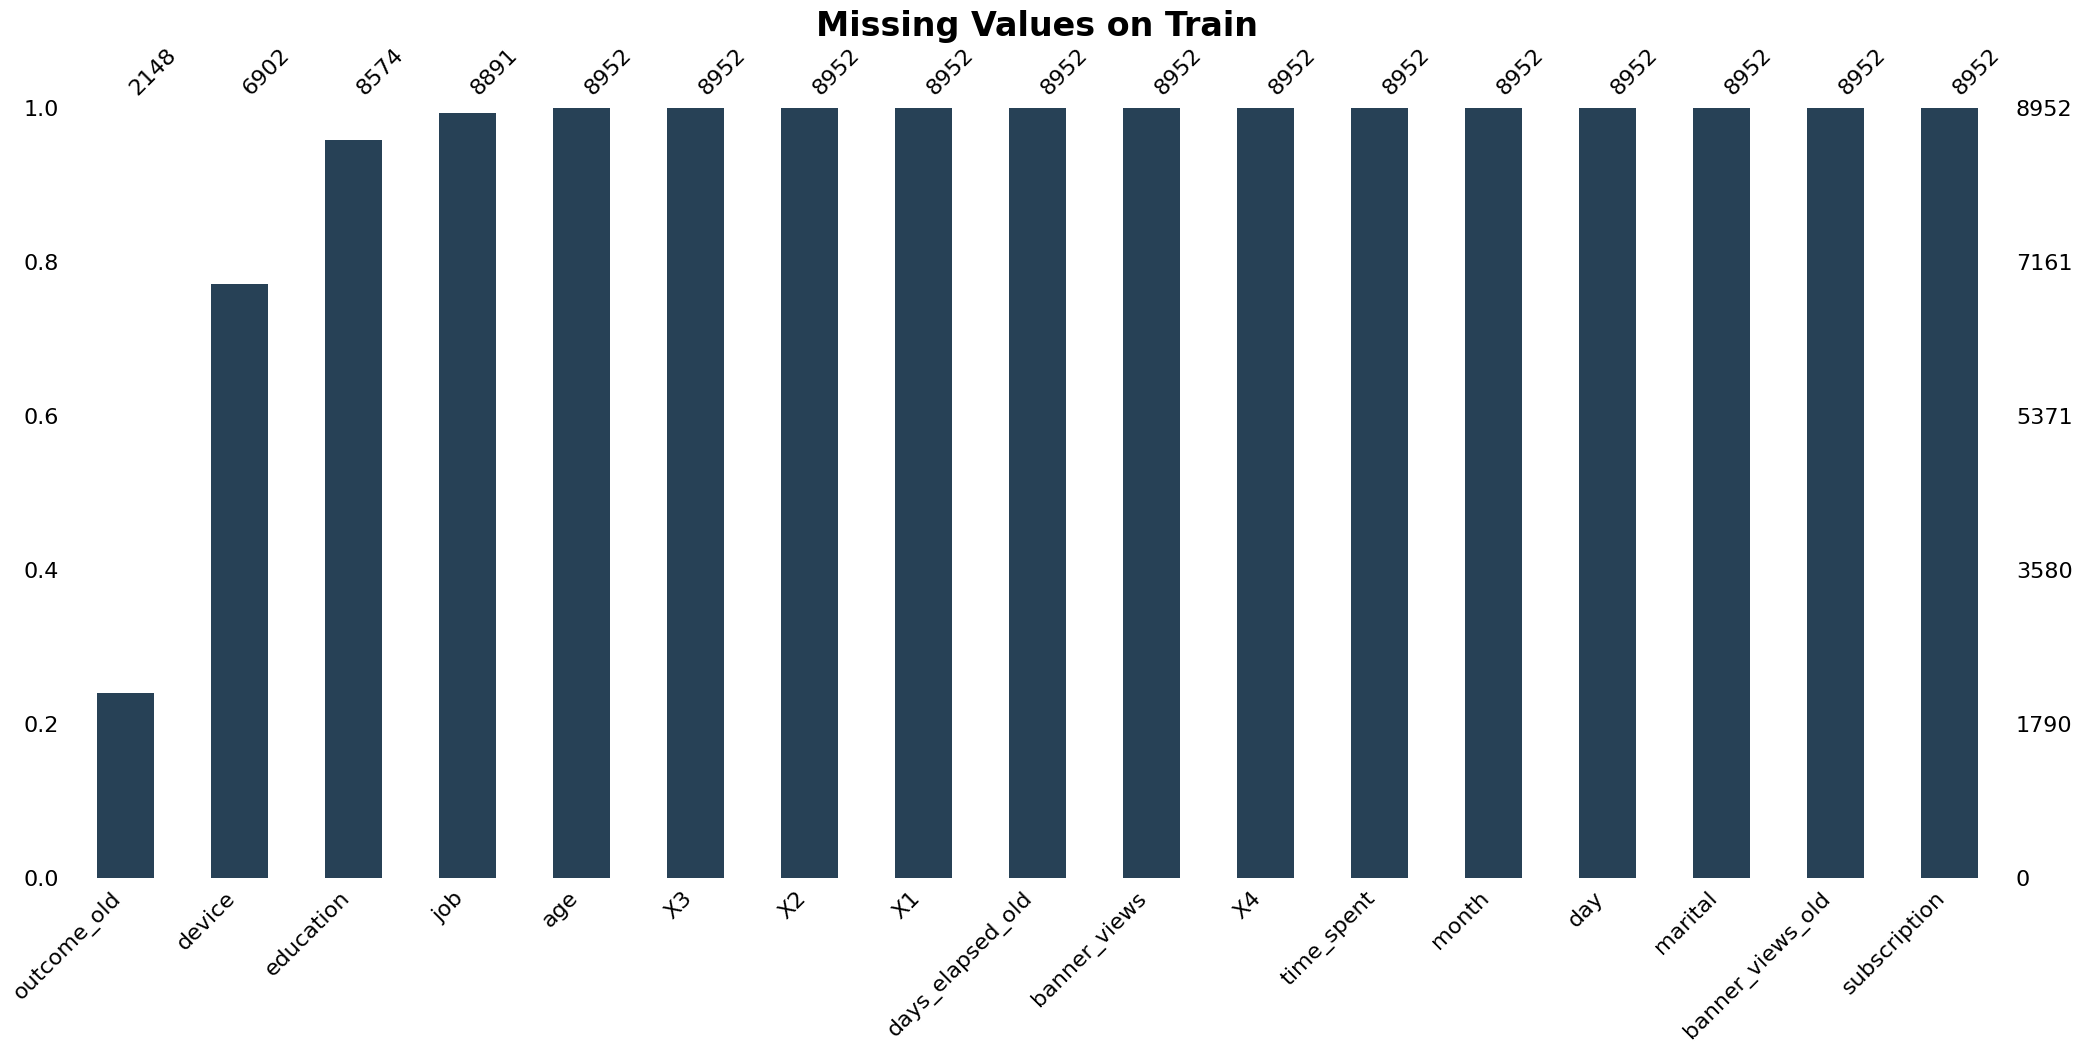

In [115]:
msno.bar(train,color=main_col, sort="ascending")
plt.title("Missing Values on Train", fontweight='bold', fontsize=24)

Text(0.5, 1.0, 'Missing Values on Test')

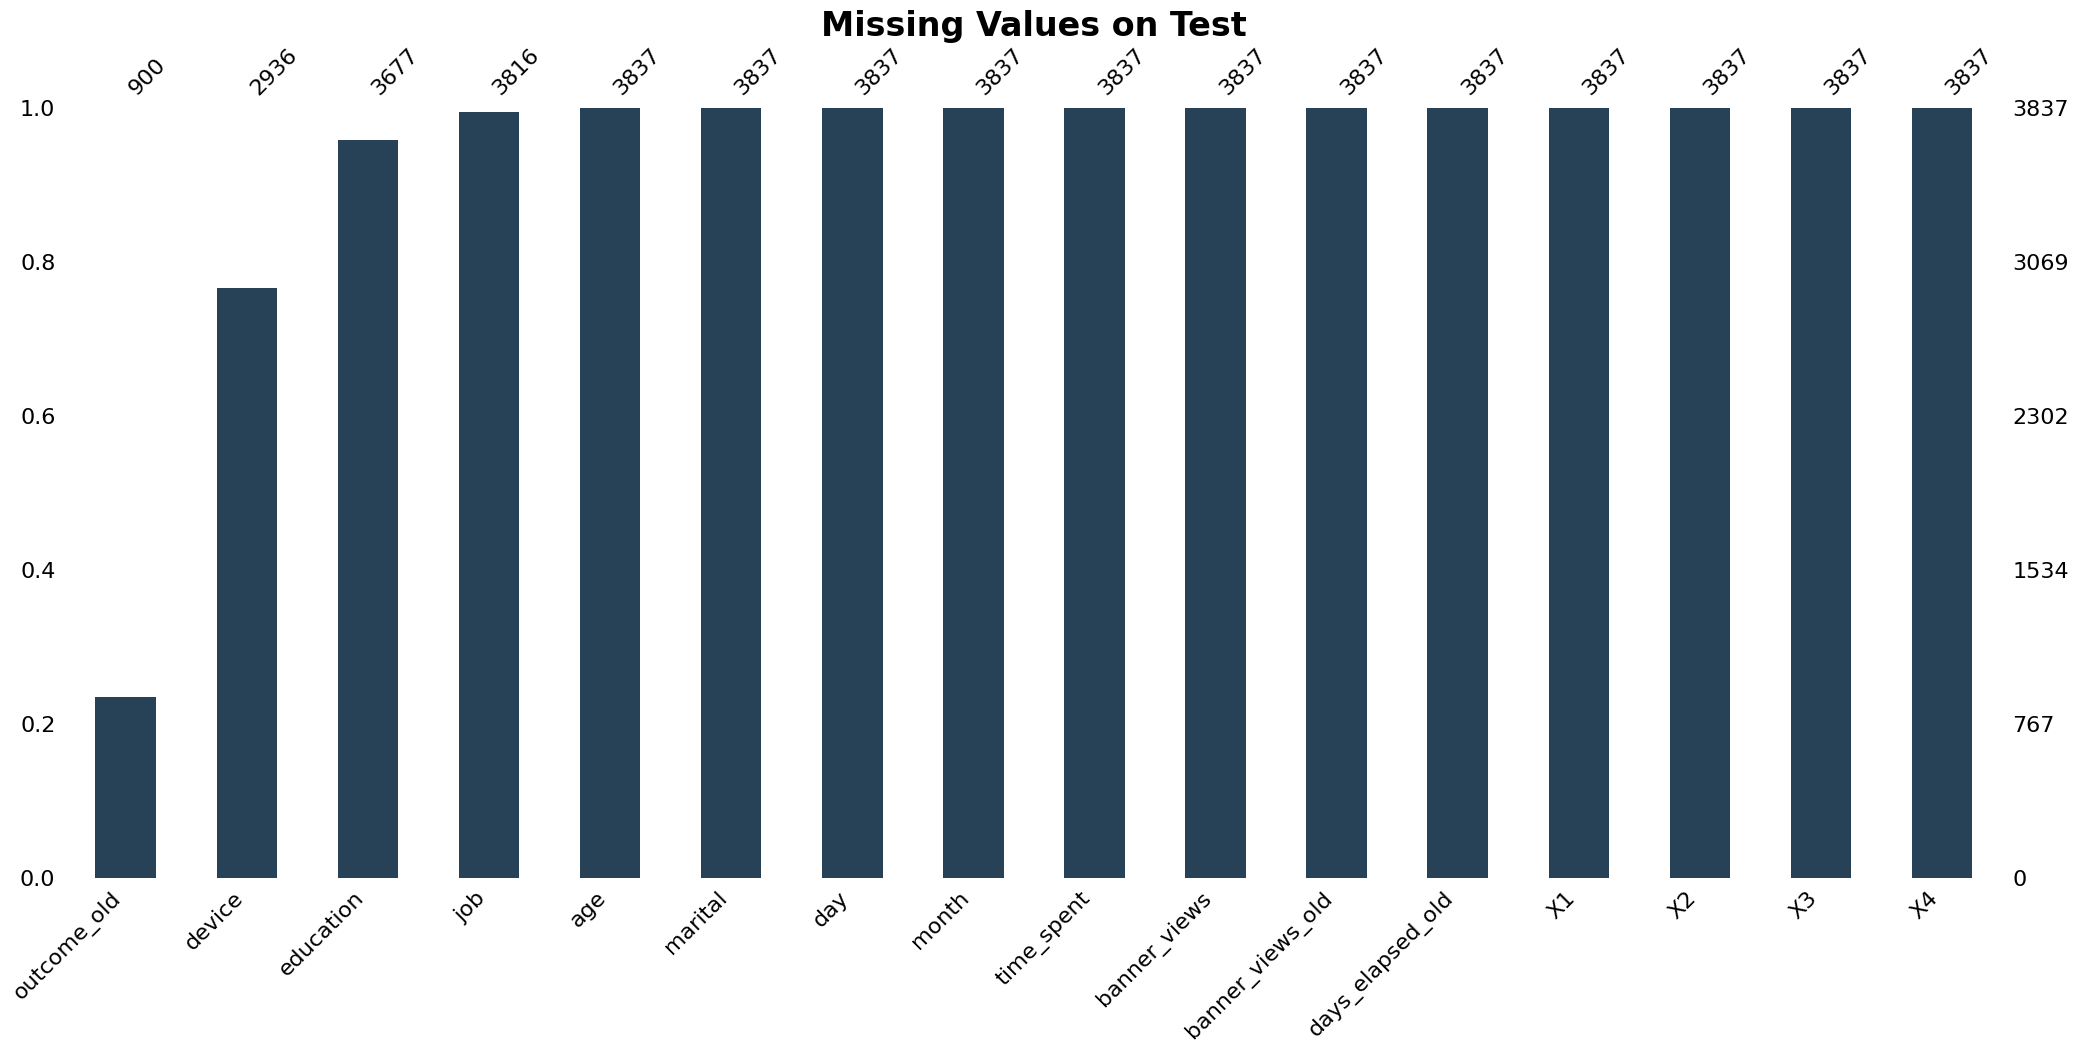

In [116]:
msno.bar(test,color=main_col, sort="ascending")
plt.title("Missing Values on Test", fontweight='bold', fontsize=24)

## Facets

In [79]:
gfsg = GenericFeatureStatisticsGenerator()
proto = gfsg.ProtoFromDataFrames([{'name': 'dataset', 'table': train.iloc[:,5:6]}])

AttributeError: 'CategoricalDtype' object has no attribute 'char'

In [46]:


html = """
    <link rel="import" href="/nbextensions/facets-dist/facets-jupyter.html">
    <facets-overview id="elem" height="600"></html>
    <script>
      document.querySelector("#elem").protoInput = """ + str(proto) + """
    </script>
"""
display(HTML(html))




NameError: name 'proto' is not defined

In [15]:
train

,age,job,marital,education,device,day,month,time_spent,banner_views,banner_views_old,days_elapsed_old,outcome_old,X1,X2,X3,X4,subscription
Id,,,,,,,,,,,,,,,,,
0,28,freelance,married,grad_school,smartphone,4,2,26.80,3,4,196,failure,False,False,True,0.072803,1
1,48,industrial_worker,married,university,smartphone,30,4,13.05,1,1,79,success,False,False,False,0.075454,1
2,27,teacher,married,university,smartphone,14,7,8.10,3,0,-1,NaN,False,True,True,0.068110,0
3,44,unemployed,divorced,university,smartphone,13,5,7.10,2,1,369,other,False,False,True,0.091942,0
4,29,manager,single,grad_school,smartphone,26,4,15.90,2,2,143,success,False,False,False,0.085922,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8947,54,industrial_worker,married,university,smartphone,16,7,7.30,1,0,-1,NaN,True,False,False,0.072803,0
8948,43,industrial_worker,married,university,smartphone,4,2,37.75,2,0,-1,NaN,False,False,True,0.081456,1
8949,27,manager,single,grad_school,NaN,5,6,29.00,3,0,-1,NaN,False,False,True,0.079186,1
